In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Documentation for model.ipynb

This Python script is used for processing and analyzing a dataset of car prices. It uses multiple machine learning models to predict the selling price of a car given various features.

## Imports and data loading

In [2]:
# Imports necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reads data from a CSV file
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


The script starts by importing necessary Python libraries like Pandas, Numpy, Seaborn, and Matplotlib. It then loads a dataset of car prices from a CSV file.

## Exploratory data analysis

In [4]:
# Basic analysis and visualization of the data
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df['Year'].max()

2018

In [9]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

The script then performs some basic exploratory data analysis, including checking the shape of the data, data types of the columns, and null values. It also checks the maximum year and unique years in the 'Year' column.

## Data preprocessing

In [10]:
# Data preprocessing
from datetime import datetime

df['No. years'] = datetime.now().year - df['Year']
df = df.drop(['Year'], axis=1)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [11]:
# We could remove the 'Car_Name' column as it does not seem to have a significant impact on the selling price.
df = df.drop('Car_Name', axis=1)

df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No. years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In the data preprocessing step, the script calculates the number of years since the car was made and removes the 'Year' and 'Car_Name' columns. It then converts categorical variables into dummy/indicator variables.

## Correlation analysis

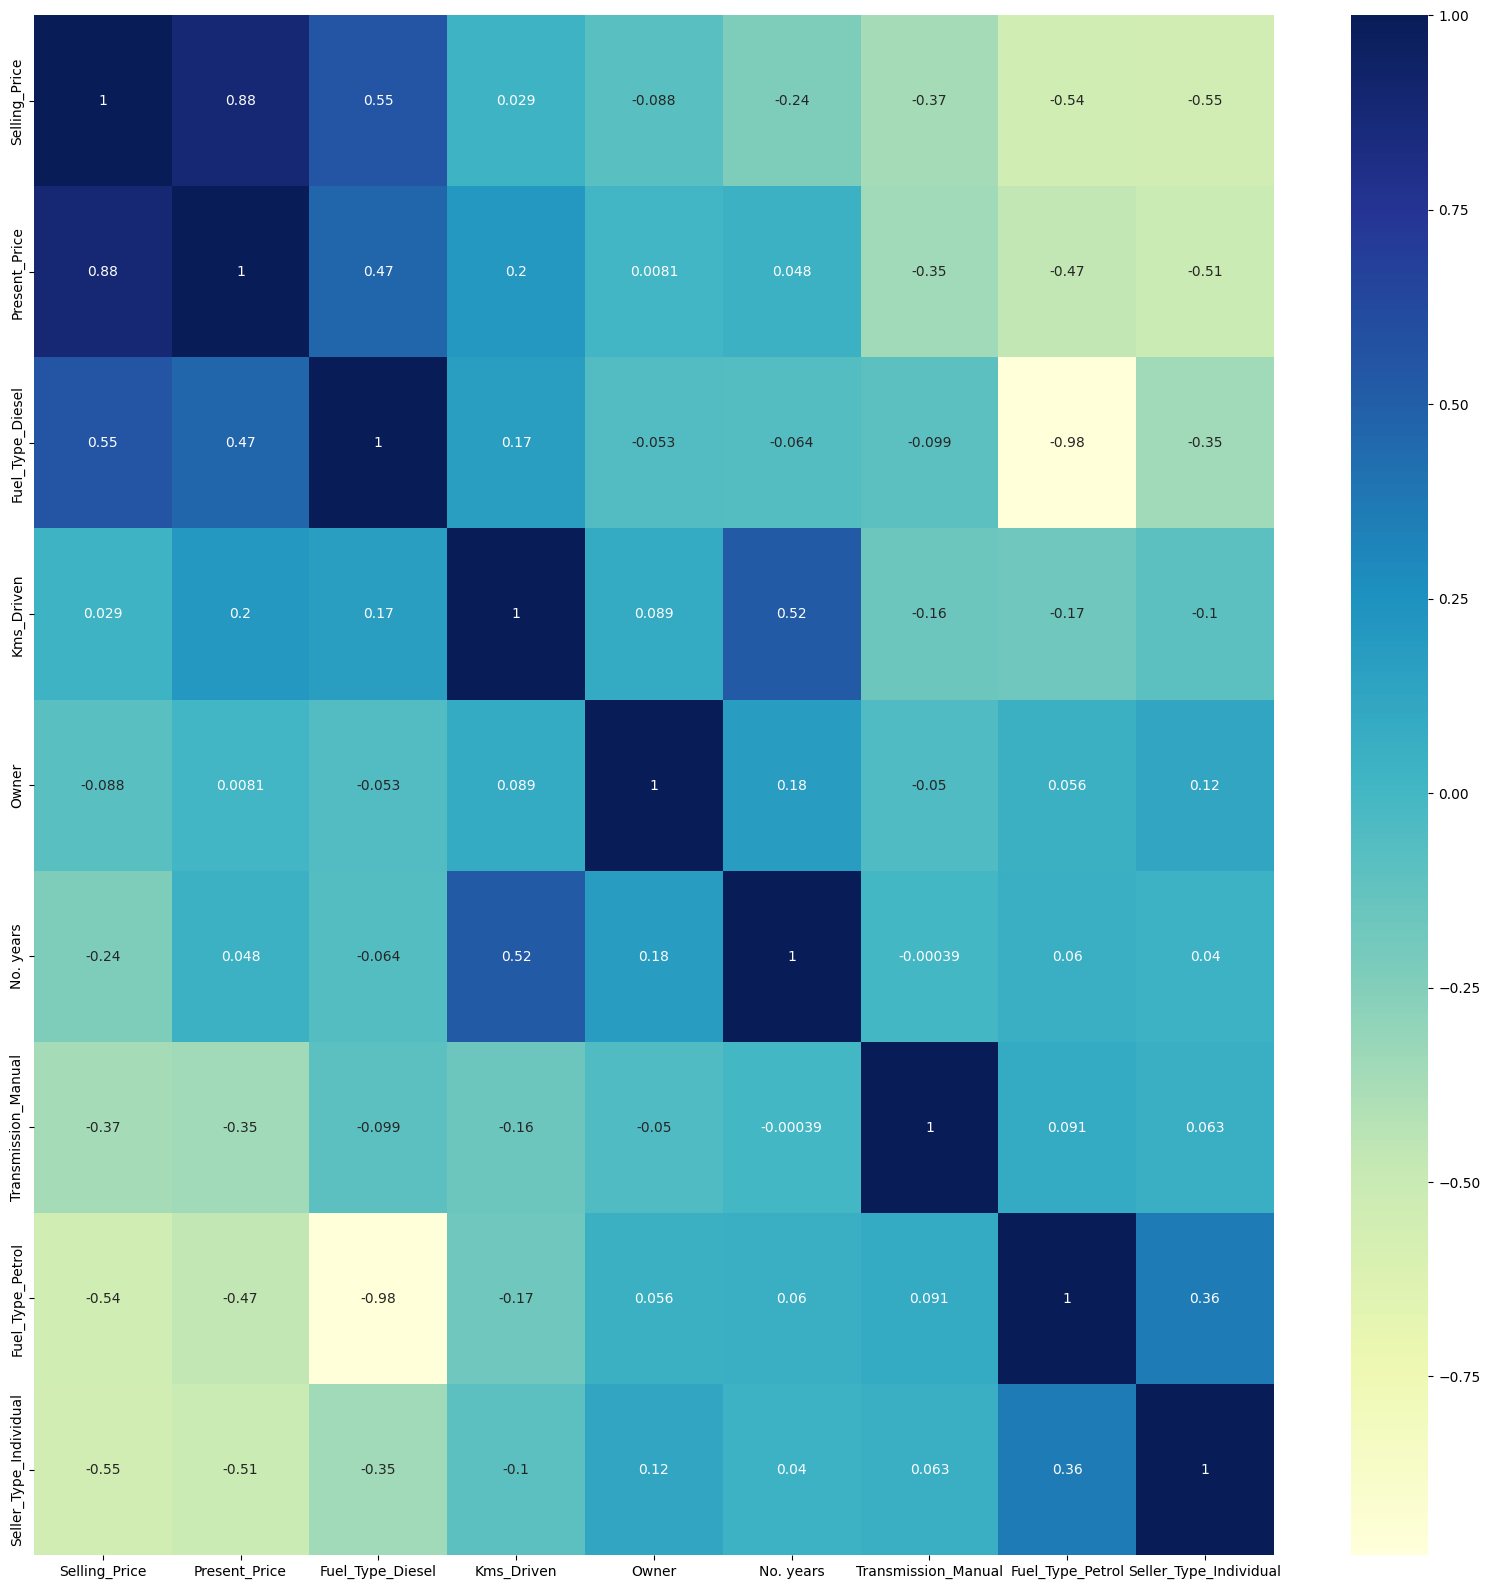

In [12]:
# Correlation analysis
corr = df.corr()

corr_organizado_Selling = corr['Selling_Price'].sort_values(ascending=False)
# top5_corr = corr.nlargest(5, 'Selling_Price')['Selling_Price'].index
# col1 = df[top5_corr].corr()
cols = corr_organizado_Selling.index.tolist()

plt.figure(figsize=(20,20))
sns.heatmap(df[cols].corr(), annot=True, cmap='YlGnBu')
plt.show()

The script performs a correlation analysis to check the relationship between the variables.

## Data splitting and standardization

In [13]:
# Splits data into features and target variable
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']
X.head()

,Present_Price,Kms_Driven,Owner,No. years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [14]:
# Standardizes the features
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
columns = X.columns
X = robust.fit_transform(X)

In [15]:
# Splits data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In this part, the data is split into features (`X`) and the target variable (`y`). The features are then standardized to have zero mean and unit variance using **RobustScaler**. The data is then split into training and testing sets.

## Model training

In [16]:
from sklearn.ensemble import ExtraTreesRegressor

# Train the ExtraTreesRegressor model
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)

ExtraTreesRegressor()

In [17]:
from sklearn.model_selection import cross_val_score

# Perform k-fold CV
scores = cross_val_score(etr, X_train, y_train, cv=10)

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.20)


The script trains an **ExtraTreesRegressor** model and then performs 10-fold cross-validation to check the model's performance.

## Feature importance analysis

In [18]:
etr.feature_importances_

array([0.40171995, 0.0412418 , 0.00149959, 0.06468487, 0.24005622,
       0.00798432, 0.11870692, 0.12410633])

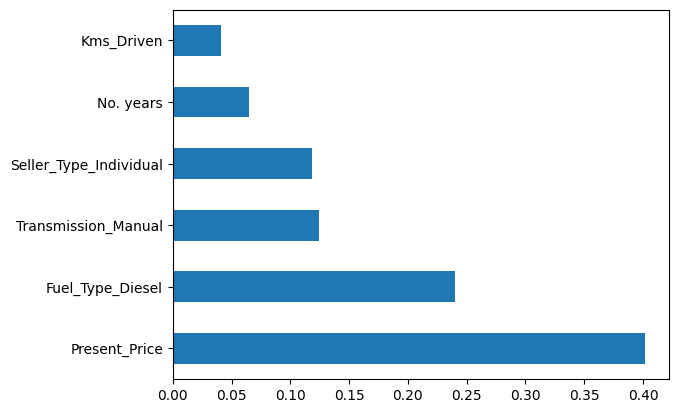

In [19]:
# Feature importance analysis
feat_importancia = pd.Series(etr.feature_importances_, index=columns)
feat_importancia.nlargest(6).plot(kind='barh')
plt.show()

The script then analyzes and visualizes the importance of different features in the prediction.

## SHAP values

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


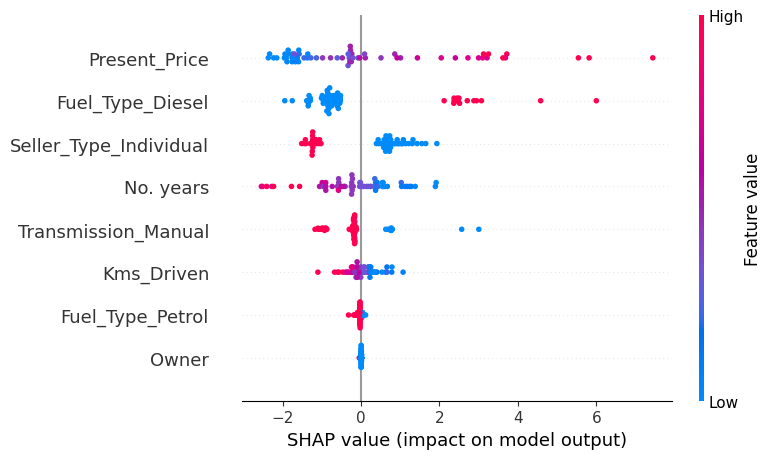

In [20]:
import shap

# Use TreeExplainer for tree-based models
explainer = shap.TreeExplainer(etr)

# Compute shap values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], feature_names=columns)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, feature_names=columns)

It computes the SHAP values, which explain the impact of features on the predictions.

## Model evaluation

R^2 score:  0.9714742852575751
MSE:  0.6571065129508203


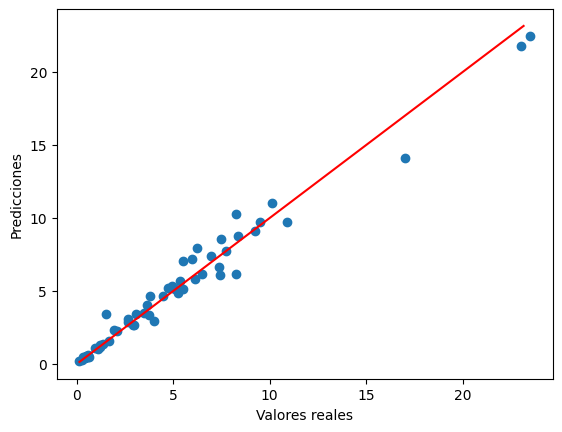

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate the model
y_pred = etr.predict(X_test)
print('R^2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.plot(np.arange(y_test.min(), y_test.max()),
         np.arange(y_test.min(), y_test.max()), '-r')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')

plt.show()

It evaluates the model on the test set using metrics like R^2 score and Mean Squared Error (MSE).

## Recursive feature elimination

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

# Creating a loop for feature selection
nof_list = np.arange(1,X_train.shape[1]+1)  
high_score = -np.inf  # Initialize with negative infinity
score_list = []

# Variable to store the optimum features and model
nof = 0
model_optimal = None

for n in nof_list:
    # Recursive feature elimination
    rfe = RFE(lr, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_rfe, y_train)

    y_pred = model.predict(X_test_rfe)
    score = r2_score(y_test, y_pred)

    score_list.append(score)
    if(score > high_score):
        high_score = score
        nof = n
        model_optimal = model
        X_train_optimal = X_train_rfe
        X_test_optimal = X_test_rfe

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.852180


It performs recursive feature elimination to select the best features for the model.

In [23]:
selected_features = pd.Series(rfe.support_, index=columns)
print(selected_features[selected_features==True].index)

Index(['Present_Price', 'Kms_Driven', 'Owner', 'No. years', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')


## Hyperparameter tuning

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

# Define preprocessing steps
preprocessor = Pipeline(steps=[
    ('robust', RobustScaler())
])

# Combine preprocessor and estimator into a single pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ExtraTreesRegressor())
])

# Define the hyperparameters grid to be searched over
param_grid = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [10, 20, 30, 40, 50, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False]
}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print(grid_search.best_params_)

# Use the best estimator for prediction
y_pred = grid_search.best_estimator_.predict(X_test)
print('R^2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


{'regressor__bootstrap': True, 'regressor__max_depth': 30, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
R^2 score:  0.9605325570573598
MSE:  0.9091556177049194


The script tunes the hyperparameters of the **ExtraTreesRegressor** model using **GridSearchCV**.

## Model comparison

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Compare multiple models
models = [
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(objective ='reg:squarederror') # xgboost requires an objective parameter
]

# Compare multiple models
models = [
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# dictionary to store the models
model_objects = {}

for model in models:
    model_name = model.__class__.__name__

    # Fit the model to the data
    model.fit(X_train, y_train)

    # Perform k-fold CV (let's use 5 folds as an example)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # store the model and results
    model_objects[model_name] = {'Model': model, 'Avg R2 Score': scores.mean(), 'Avg MSE': -mse_scores.mean()}

# get the model with the highest R2 score
best_model_r2 = max(model_objects.items(), key=lambda x: x[1]['Avg R2 Score'])[0]

# get the model with the lowest MSE
best_model_mse = min(model_objects.items(), key=lambda x: x[1]['Avg MSE'])[0]

print(f'The model with the highest avg R2 Score is {best_model_r2} with a score of {model_objects[best_model_r2]["Avg R2 Score"]}')
print(f'The model with the lowest avg MSE is {best_model_mse} with a MSE of {model_objects[best_model_mse]["Avg MSE"]}')

if best_model_r2 == best_model_mse:
    best_model = model_objects[best_model_r2]['Model']
    print(f'The best model is {best_model.__class__.__name__}')

The model with the highest avg R2 Score is GradientBoostingRegressor with a score of 0.8927594667900257
The model with the lowest avg MSE is GradientBoostingRegressor with a MSE of 2.8899530476147497
The best model is GradientBoostingRegressor


It trains and compares multiple models like Extra Trees Regressor, Random Forest Regressor, Gradient Boosting Regressor, and XGBRegressor.

## Model serialization

In [26]:
import pickle

with open('modelFirst.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

with open('modelSecond.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(robust, f)

In the end, the script saves the trained models and the scaler object as pickle files. These files can be loaded later to make predictions on new data.